0.0 10.0 0 400
0.02493765586034913 3216.0199999999995 -1608.0099999999998 0.0
[[ 3216.02062189 -1608.01           0.         ...     0.
      0.             0.        ]
 [-1608.01        3216.02248755 -1608.01       ...     0.
      0.             0.        ]
 [    0.         -1608.01        3216.02559698 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...  3314.52933763
  -1608.01           0.        ]
 [    0.             0.             0.         ... -1608.01
   3315.02498131 -1608.01      ]
 [    0.             0.             0.         ...     0.
  -1608.01        3315.52186877]]
2.9998056468165792
6.999028164531277
10.997628541598054


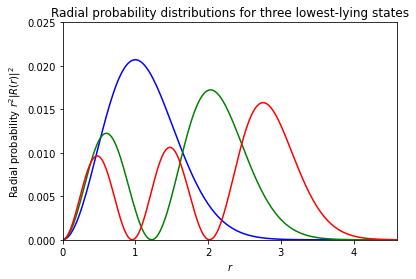

In [22]:
from matplotlib import pyplot as plt

import numpy as np

def initialize():
  RMin = 0.0
  RMax = 10.0
  lOrbital = 0
  Dim = 400
  return RMin, RMax, lOrbital, Dim

def potential(r):
  return r*r


#get the boundary, orbital momentum and number of integration matrix

RMin, RMax, lOrbital, Dim = initialize()
print(RMin, RMax, lOrbital, Dim)
#initialize the constant

Step = RMax/(Dim+1)

DiagConst = 2.0/ (Step*Step)

NondiagConst = -1.0/ (Step*Step)

OrbitalFactor = lOrbital * (lOrbital + 1.0)

print(Step, DiagConst, NondiagConst, OrbitalFactor)

#calculate array of potential values

v = np.zeros(Dim)

r = np.linspace(RMin, RMax, Dim)

#print(v, r)

for i in range(Dim):
  r[i] = RMin + (i+1)* Step
  v[i] = potential(r[i]) + OrbitalFactor/(r[i]*r[i])
  #print(r[i], v[i])


#setting up the tridiagonal matrix and find eigenvectors and eigenvalues

Hamiltonian = np.zeros((Dim,Dim))

Hamiltonian[0,0] = DiagConst + v[0];
Hamiltonian[0,1] = NondiagConst;

for i in range(1, Dim-1):
  Hamiltonian[i,i-1] = NondiagConst;
  Hamiltonian[i,i] = DiagConst + v[i];
  Hamiltonian[i,i+1] = NondiagConst;
  


Hamiltonian[Dim-1, Dim-2] = NondiagConst;
Hamiltonian[Dim-1, Dim-1] = DiagConst + v[Dim-1];

print(Hamiltonian)
#use linalg.eig to find eigenvector and eigenvalues

EigValues, EigVectors = np.linalg.eig(Hamiltonian)

#sort eigenvalues and eigenvector

permute = EigValues.argsort()
EigValues = EigValues[permute]
EigVectors = EigVectors[:,permute]

#plot the result for the three lowest lying eigenstates

for i in range(3):
  print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector =EigVectors[:,1]
ThirdEigvector = EigVectors[:,2]

plt.plot(r, FirstEigvector**2, 'b-', r, SecondEigvector**2,'g-', r, ThirdEigvector**2, 'r-')

plt.axis([0,4.6,0.0,0.025])
plt.xlabel(r'$r$')
plt.ylabel('Radial probability $r^2|R(r)|^2$')
plt.title(r'Radial probability distributions for three lowest-lying states')
plt.savefig('eigenvector.pdf')
plt.savefig('eigenvector.png')
plt.show()